# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Tarantino, Giovanbattista (338137).

Now, fill the python list below with the Student IDs of the team

In [1]:
StudentIDs = [338137]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Shopping centres
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
History
Psychology
Mathematics
Physics
Internet
PC
Chemistry
Geography
Foreign languages
Medicine
Law
Cars
Art exhibitions
Countryside, outdoors
Dancing
Musical instruments
Passive sport
Active sport
Celebrities
Shopping
Science and technology
Pets
Horror
Thriller
Comedy
Romantic
War
Animated
Documentary
Western
Action
Music
Dance
Folk
Country
Classical music
Musical
Pop
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Alternative
Latino
Opera
Prioritising workload
Writing notes
Thinking ahead
Friends versus money
Decision making
Elections
Self-criticism
Judgment calls
Hypochondria
Eating to survive
Giving
Compassion to animals
Cheating in school
Health
Changing the past
God
Number of friends
Punctuality
Lying
Waiting
Mood swings
Socializing
Achievements
Responding to a serious letter


,Finances,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,History,Psychology,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
660,3,3,3,3,1,5,former smoker,drink a lot,5,5,...,30,168,54,2,female,right,masters degree,no,village,house/bungalow
666,1,5,3,5,4,5,never smoked,never,3,3,...,16,153,62,1,female,right,primary school,no,city,block of flats
549,2,5,5,5,2,4,never smoked,drink a lot,4,3,...,18,176,76,0,male,right,secondary school,yes,city,block of flats
19,3,5,4,5,5,5,tried smoking,never,4,5,...,19,167,51,1,female,right,secondary school,no,city,block of flats
431,3,4,5,3,2,4,former smoker,drink a lot,2,3,...,18,161,74,1,female,right,primary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3,2,4,3,4,5,tried smoking,social drinker,3,3,...,20,176,64,1,male,right,secondary school,no,village,house/bungalow
283,3,3,3,3,5,4,tried smoking,social drinker,5,2,...,19,180,80,1,male,left,secondary school,no,village,block of flats
629,4,3,3,4,3,2,current smoker,social drinker,1,2,...,18,178,80,2,male,right,secondary school,no,city,house/bungalow
219,3,4,3,1,1,3,current smoker,social drinker,4,5,...,18,160,53,2,female,right,secondary school,yes,city,block of flats



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,History,Psychology,...,Finding lost valuables,Internet usage,Flying,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs
660,3,3,3,3,1,5,former smoker,drink a lot,5,5,...,1,most of the day,2,4,5,1,1,1,2,1
666,1,5,3,5,4,5,never smoked,never,3,3,...,1,few hours a day,1,1,1,1,1,1,5,3
549,2,5,5,5,2,4,never smoked,drink a lot,4,3,...,3,most of the day,1,1,2,1,5,1,1,4
19,3,5,4,5,5,5,tried smoking,never,4,5,...,4,few hours a day,1,2,1,5,5,4,5,5
431,3,4,5,3,2,4,former smoker,drink a lot,2,3,...,2,few hours a day,5,3,2,2,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3,2,4,3,4,5,tried smoking,social drinker,3,3,...,3,few hours a day,1,2,2,4,4,2,1,4
283,3,3,3,3,5,4,tried smoking,social drinker,5,2,...,1,most of the day,1,1,1,2,2,2,2,4
629,4,3,3,4,3,2,current smoker,social drinker,1,2,...,4,most of the day,3,2,2,1,1,2,1,3
219,3,4,3,1,1,3,current smoker,social drinker,4,5,...,1,few hours a day,1,2,3,3,3,1,4,2



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
660,30,168,54,2,female,right,masters degree,no,village,house/bungalow
666,16,153,62,1,female,right,primary school,no,city,block of flats
549,18,176,76,0,male,right,secondary school,yes,city,block of flats
19,19,167,51,1,female,right,secondary school,no,city,block of flats
431,18,161,74,1,female,right,primary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...
162,20,176,64,1,male,right,secondary school,no,village,house/bungalow
283,19,180,80,1,male,left,secondary school,no,village,block of flats
629,18,178,80,2,male,right,secondary school,no,city,house/bungalow
219,18,160,53,2,female,right,secondary school,yes,city,block of flats


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [3]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
# import ...
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [4]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE MinMaxScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
Using pandas `DataFrame.select_dtypes`, *five categorical features* were found, `['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage']`. As noted in the project requirements, these categorical values represent an ordinal progression (e.g. for `'Alchol'`: `'Never'` < `'Social Drinker'` < `'Drink a Lot'`). Therefore, an *Ordinal Encoding* allows to map these values to integers, preserving the inherent order of the data. It also avoids increasing the feature's dimensionality, as *One-Hot Encoding* would do.

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
As assigned, the `MinMaxScaler` was applyed for the preprocessing step. This transformation scales each feature to the interval `[0, 1]` according to the formula $x_{\text{scaled}} = \frac{x-x_{\text{min}}}{x_{\text{max}}-x_{\text{min}}}$. This preserves the order of the data, and ensures that features with large values do not dominate during the principal compoment analysis.

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [5]:
# Checking for categorical features

categorical_columns = responses_ft.select_dtypes(include=['object']).columns.tolist()
print(f"\tCategorical features")
for col in categorical_columns:
    print(col)

# Get unique values per feature
unique_values_per_column = {col: responses_ft[col].unique() for col in categorical_columns}

print(f"\n\tUnique values per categorical feature")
for col, values in unique_values_per_column.items():
    print(f"{col}: {values}")
print("\n\tThose values needs to be manually ordered")

	Categorical features
Smoking
Alcohol
Punctuality
Lying
Internet usage

	Unique values per categorical feature
Smoking: ['former smoker' 'never smoked' 'tried smoking' 'current smoker']
Alcohol: ['drink a lot' 'never' 'social drinker']
Punctuality: ['early' 'on time' 'late']
Lying: ['sometimes' 'only to avoid hurting someone' 'everytime it suits me'
 'never']
Internet usage: ['most of the day' 'few hours a day' 'less than an hour a day']

	Those values needs to be manually ordered


Before applying the `OrdinalEncoder`, the order for each categorical feature is explicitely defined in a list. A default `OrdinalEncoder` will use alphabetical order, which is not necessary the correct order in the dataset. Passing the custom ordering will overwrite this behaviour.

In [6]:
# Manual order for each categorical feature.
# The order was taken from the dataset description
cat_smoking = ['never smoked', 'tried smoking', 'former smoker', 'current smoker'] # Appendix A.5
cat_alcohol = ['never', 'social drinker', 'drink a lot'] # Appendix A.5
cat_punctuality = ['early', 'on time', 'late'] # Appendix A.6
cat_lying = ['never', 'sometimes', 'only to avoid hurting someone', 'everytime it suits me'] # Appendix A.6
cat_internet_usage = ['less than an hour a day', 'few hours a day', 'most of the day'] # Appendix A.6

encoder = OrdinalEncoder(categories=[cat_smoking, cat_alcohol, cat_punctuality, cat_lying, cat_internet_usage], dtype=np.int64)

In [7]:
# Copying the dataframe, and encoding only the categorical features
responses_ft_enc = responses_ft.copy()
responses_ft_enc[categorical_columns] = encoder.fit_transform(responses_ft[categorical_columns])

print("\tEncoded Data")
display(responses_ft_enc.head())

# Comparing the original and the encoded data. Using only "Smoking" for this example
compare = "Smoking"
compare_df = pd.concat([responses_ft[compare], responses_ft_enc[compare]], axis=1)
compare_df.columns = ['Smoking_original', 'Smoking_encoded'] # Change column name for clarity

print(f"\tComparing '{compare}'")
display(compare_df)

	Encoded Data


,Finances,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,History,Psychology,...,Finding lost valuables,Internet usage,Flying,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs
660,3,3,3,3,1,5,2,2,5,5,...,1,2,2,4,5,1,1,1,2,1
666,1,5,3,5,4,5,0,0,3,3,...,1,1,1,1,1,1,1,1,5,3
549,2,5,5,5,2,4,0,2,4,3,...,3,2,1,1,2,1,5,1,1,4
19,3,5,4,5,5,5,1,0,4,5,...,4,1,1,2,1,5,5,4,5,5
431,3,4,5,3,2,4,2,2,2,3,...,2,1,5,3,2,2,4,1,4,1


	Comparing 'Smoking'


,Smoking_original,Smoking_encoded
660,former smoker,2
666,never smoked,0
549,never smoked,0
19,tried smoking,1
431,former smoker,2
...,...,...
162,tried smoking,1
283,tried smoking,1
629,current smoker,3
219,current smoker,3


In [8]:
# Using MinMaxScaler
scaler = MinMaxScaler()

data_pp = scaler.fit_transform(responses_ft_enc)
responses_ft_pp = pd.DataFrame(data_pp, columns=responses_ft_enc.columns, index=responses_ft_enc.index)

print("\tPreprocessed Data")
display(responses_ft_pp.head())

	Preprocessed Data


,Finances,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,History,Psychology,...,Finding lost valuables,Internet usage,Flying,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs
660,0.50,0.50,0.50,0.5,0.00,1.00,0.666667,1.0,1.00,1.0,...,0.00,1.0,0.25,0.75,1.00,0.00,0.00,0.00,0.25,0.00
666,0.00,1.00,0.50,1.0,0.75,1.00,0.000000,0.0,0.50,0.5,...,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.50
549,0.25,1.00,1.00,1.0,0.25,0.75,0.000000,1.0,0.75,0.5,...,0.50,1.0,0.00,0.00,0.25,0.00,1.00,0.00,0.00,0.75
19,0.50,1.00,0.75,1.0,1.00,1.00,0.333333,0.0,0.75,1.0,...,0.75,0.5,0.00,0.25,0.00,1.00,1.00,0.75,1.00,1.00
431,0.50,0.75,1.00,0.5,0.25,0.75,0.666667,1.0,0.25,0.5,...,0.25,0.5,1.00,0.50,0.25,0.25,0.75,0.00,0.75,0.00


#### Comment the results obtained after the preprocessing operation (max 100 words):
Applying the `OrdinalEncoder` with the custom ordering, the categorical values were converted in numerical values, without losing the order meaning of the original answers. However, this encoding by default map values in the interval $[0, v-1]$, where $v$ is the number of unique values for the given feature we are converting.

The `MinMaxScaler` is therefore needed for having a fair comparison between all the features. After scaling, all the values are in the interval $[0, 1]$.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

In [9]:
# Color Map for categories
categories = list(features_by_type.keys())
colors_map = {cat: cm.tab10(i) for i, cat in enumerate(categories)}

# Convert feature index to colors
def get_colors_for_index(index, feature_dict=features_by_type, color_map=colors_map):
    bar_colors = []
    for feature in index:
        # Find which macrocategory the feature belongs to
        found_cat = next((cat for cat, feats in feature_dict.items() if feature in feats), None)
        bar_colors.append(color_map.get(found_cat, 'gray')) # Default to gray if not found
    return bar_colors

In [10]:
# Create Variance bar plot
def variance_bar_plot(df, plot_name, colors_map = colors_map):
    # Generate color
    colors = get_colors_for_index(df.index)
    # Legend for the colors
    legend = [Patch(facecolor=color, edgecolor='black', label=cat) for cat, color in colors_map.items()]
    
    #Visualize
    plt.figure(figsize=(15, 5))
    
    plt.bar(df.index, df.values, color=colors, edgecolor='black')
    plt.title(plot_name, fontsize=14)
    plt.ylabel('Variance')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.legend(handles=legend, title="Feature Types", bbox_to_anchor=(1.01, 1), loc='upper left')
    
    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()

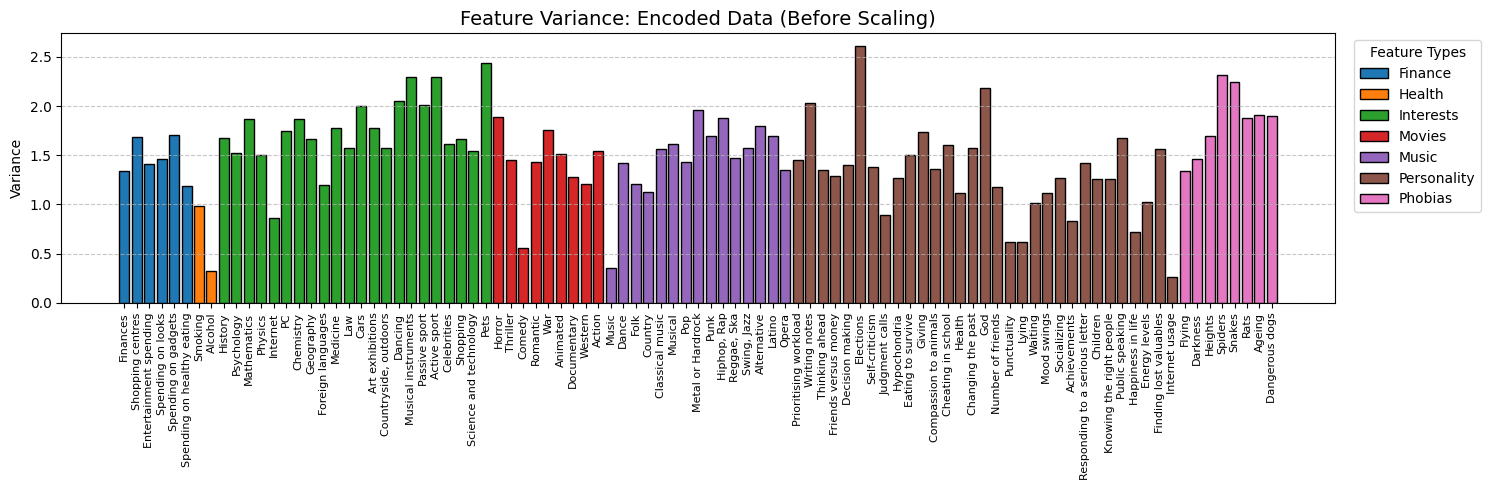

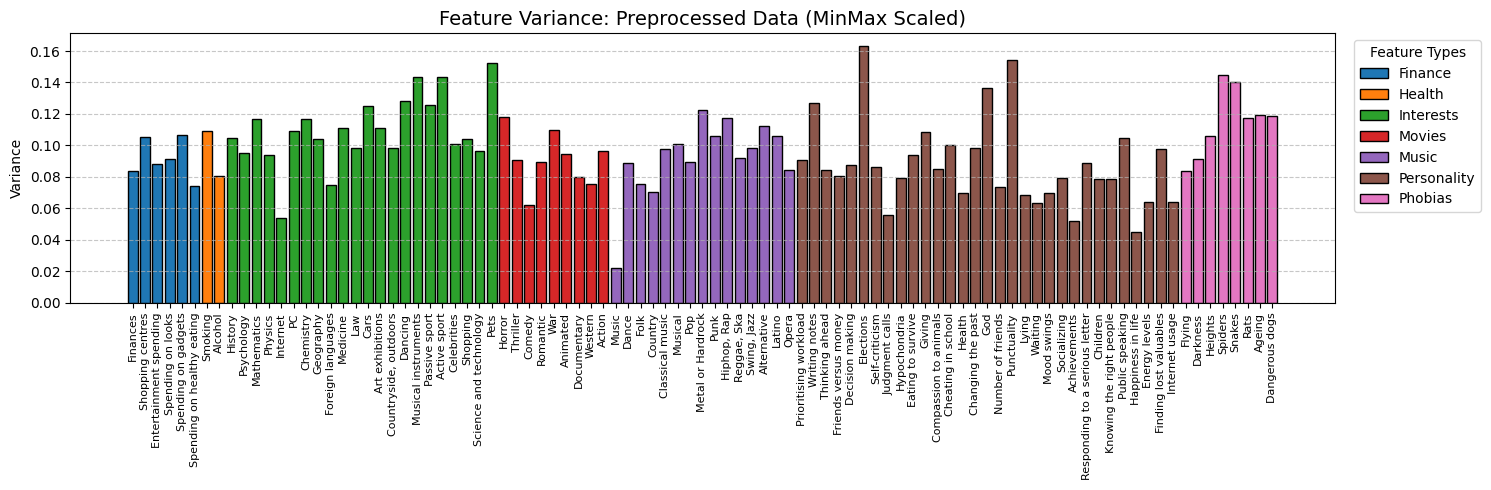

In [11]:
var_enc = responses_ft_enc.var()
var_pp = responses_ft_pp.var()

variance_bar_plot(var_enc, "Feature Variance: Encoded Data (Before Scaling)")
variance_bar_plot(var_pp, "Feature Variance: Preprocessed Data (MinMax Scaled)")

#### Comment the results obtained for the variances (max 150 words):
In the *Encoded* dataset, variance fluctuate based on the original range of values. Almost all features follow a `1-5` scale, but the categorical values are being mapped on different scales based on the number of unique values, following either a `0-3` or `0-2` scale. This makes the comparison between all feature unbalanced.

In the *Preprocessed* dataset instead, the `MinMaxScaler` copressed all features to the same `[0, 1]` interval, making feature variances now comparable. The differences between features now purely reflect the diversity in user responses.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

In [12]:
# Comparison plot
def compare_explained_variance(all_df: dict[str, pd.DataFrame], cum_variance_to_print=[0.8, 0.9]):
    all_pca_df: dict[str, PCA] = {name: PCA().fit(df) for name, df in all_df.items()} # Computing PCA for all given dataset
    
    # All cumulative explained variance line plot will be in the same figure
    plt.figure(figsize=(10, 6))
    
    # Add orizontal line for each threshold level
    for threshold in cum_variance_to_print: plt.axhline(y=threshold, color='gray', linestyle='--')
    
    for name, pca_df in all_pca_df.items():
        # Compute cumulative variance
        cum_variance = pca_df.explained_variance_ratio_.cumsum()
        
        num_feature = len(cum_variance)
        x_axis = range(1, num_feature+1)
        
        # Plot
        plt.plot(x_axis, cum_variance, label=name)        
        
        # Compute and print the number of required features to reach the provided thershold
        if len(cum_variance_to_print) > 0:
            print(f"\n\tDataset: {name}")
            for threshold in cum_variance_to_print:                
                n_components = np.argmax(cum_variance >= threshold) + 1
                print(f"Components needed for {threshold*100:.2f}%: {n_components}/{num_feature}")
        
    plt.title("Cumulative Explained Variance Ratio", fontsize=14)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


	Dataset: Encoded Dataset
Components needed for 80.00%: 45/93
Components needed for 90.00%: 62/93

	Dataset: Preprocessed Dataset
Components needed for 80.00%: 46/93
Components needed for 90.00%: 63/93


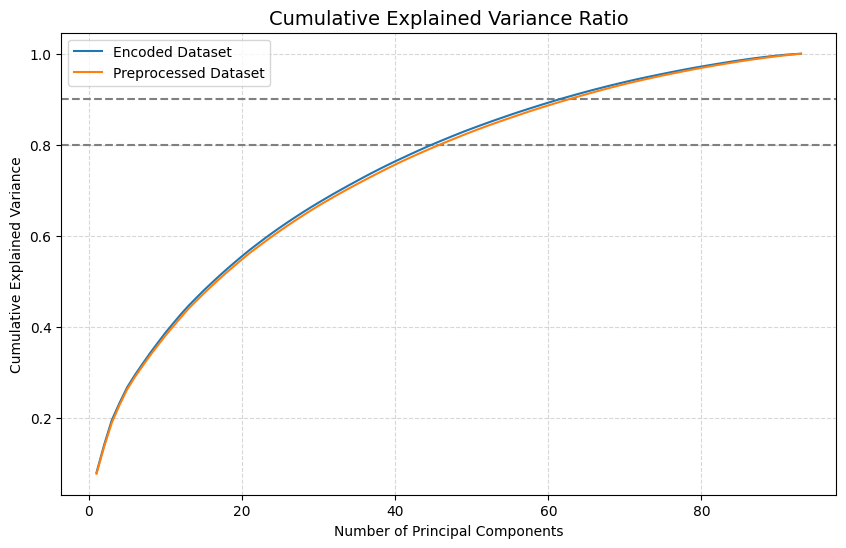

In [13]:
# Dictonary: key -> name of the dataset, for the plot; value -> dataset itself
all_df = {
    'Encoded Dataset': responses_ft_enc,
    'Preprocessed Dataset': responses_ft_pp
}
compare_explained_variance(all_df)

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

The cumulative variance curve for both datasets looks similar, because the original scales (mostly 1-5) were not drastically different to begin with. However, the *Preprocessed* curve is the reliable one for the analysis. It shows a logarmithmic-like growth, indicating that there is no single "dominant" factor explaining the majority of the data. To reach high explained variance a significant number of component is required (in the *Preprocessed* dataset, 46 for 80%, 63 for 90% out of 93 total features).

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

In [14]:
# Get m=min(m', 5)
pca_full = PCA().fit(responses_ft_pp)
cumsum = pca_full.explained_variance_ratio_.cumsum()

m_prime = np.argmax(cumsum >= .33) + 1
m = min(m_prime, 5)

print(f"Components needed for 33% variance (m'): {m_prime}")
print(f"Selected m = min(m', 5) = {m}")

Components needed for 33% variance (m'): 8
Selected m = min(m', 5) = 5


Total Preserved Variance with 5 PCs: 26.28%


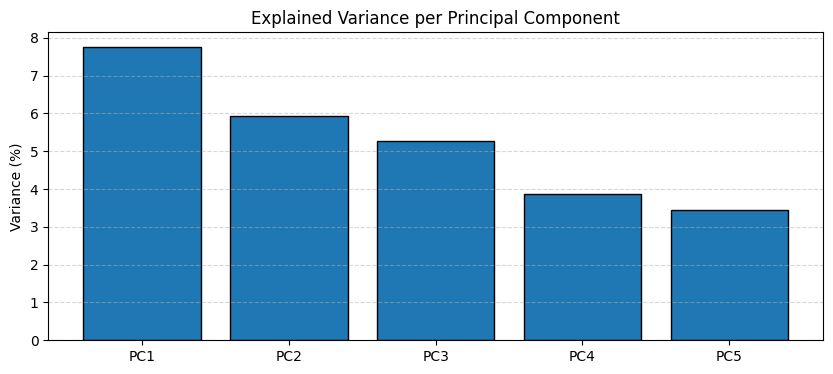

In [26]:
# Compute PCA with m compoments
pca = PCA(n_components=m)
responses_ft_pca_data = pca.fit_transform(responses_ft_pp)

# Store in dataframe
temporary_pc_names = [f'PC{i+1}' for i in range(m)]
temporary_responses_ft_pca = pd.DataFrame(
    responses_ft_pca_data, 
    columns=temporary_pc_names, 
    index=responses_ft_pp.index
)

plt.figure(figsize=(10, 4))
plt.bar(temporary_pc_names, pca.explained_variance_ratio_ * 100, edgecolor='black')
plt.title('Explained Variance per Principal Component')
plt.ylabel('Variance (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Calculate preserved variance
preserved_var = np.sum(pca.explained_variance_ratio_) * 100
print(f"Total Preserved Variance with {m} PCs: {preserved_var:.2f}%")
plt.show()

In [16]:
# Compute and print positive/negative correlated features
# Bar plot with the top features
def single_pc_analysis(pc, feature_names, n_top_features=10):
    sorted_indicies = np.argsort(np.abs(pc))[::-1] # Descending order
    top_indicies = sorted_indicies[:n_top_features]
    
    top_features = pc[top_indicies]
    top_names = [feature_names[i] for i in top_indicies]
    
    colors = ['green' if x > 0 else 'red' for x in top_features]
    
    # Print positive/negative correlated features
    # Positive
    if any([feature > 0 for feature in top_features]):
        # Only print if necessary
        print(f"\t🟢 Positive correlated features 🟢")
        for feature, name in zip(top_features, top_names):
            if feature > 0:
                print(f"{name:<30} +{feature:.2f}")
    
    # Negative
    if any([feature <= 0 for feature in top_features]):
        # Only print if necessary
        print(f"\n\t🔴 Negative correlated features 🔴")
        for feature, name in zip(top_features, top_names):
            if feature <= 0:
                print(f"{name:<30} {feature:.2f}")
    
    # Bar plot
    plt.figure(figsize=(12, 4))
    plt.bar(top_names, top_features, color=colors, alpha=0.7, edgecolor='black')
    plt.title("Top contributing features", fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

PC1
	🟢 Positive correlated features 🟢
Shopping                       +0.24
Snakes                         +0.23
Romantic                       +0.22
Spiders                        +0.22
Rats                           +0.21
Dancing                        +0.21
Writing notes                  +0.18
Dangerous dogs                 +0.18
Celebrities                    +0.18

	🔴 Negative correlated features 🔴
PC                             -0.18


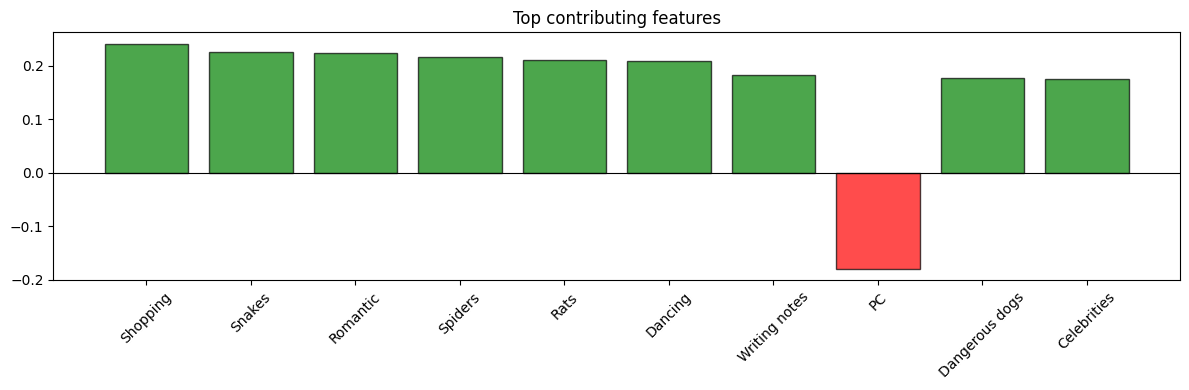

PC2
	🟢 Positive correlated features 🟢
Classical music                +0.28
Musical instruments            +0.25
Opera                          +0.22
Art exhibitions                +0.21
Swing, Jazz                    +0.21
Alternative                    +0.19
Folk                           +0.18
History                        +0.18
Documentary                    +0.17
Countryside, outdoors          +0.16


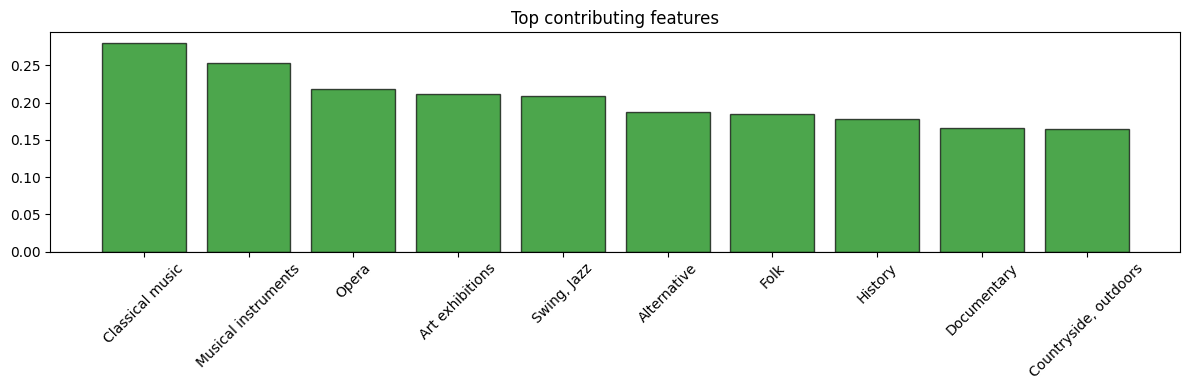

PC3
	🟢 Positive correlated features 🟢
Active sport                   +0.31
Hiphop, Rap                    +0.27
Cars                           +0.26
Spending on gadgets            +0.21
Spending on looks              +0.19
Entertainment spending         +0.18
Dance                          +0.18
Number of friends              +0.18
Socializing                    +0.18
Energy levels                  +0.17


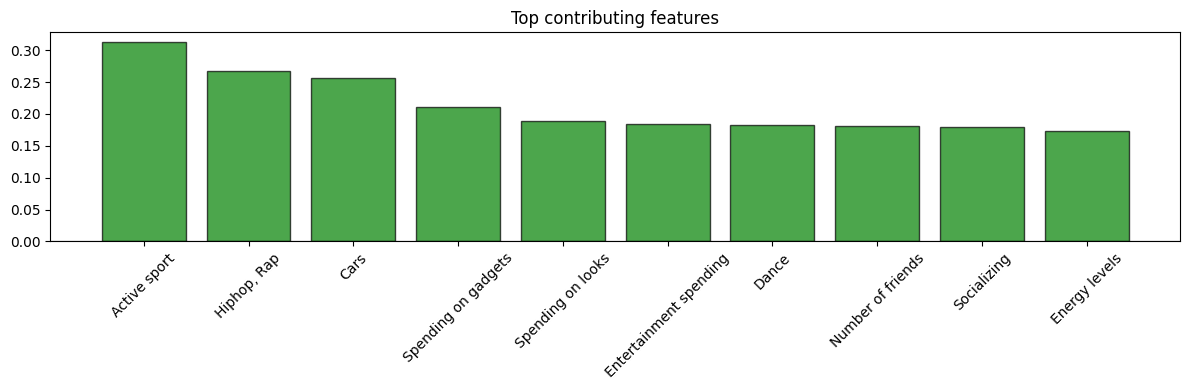

PC4
	🟢 Positive correlated features 🟢
Punctuality                    +0.29
Smoking                        +0.23
Alternative                    +0.21
Entertainment spending         +0.20

	🔴 Negative correlated features 🔴
Mathematics                    -0.24
PC                             -0.23
Physics                        -0.20
Cars                           -0.20
Finances                       -0.20
Science and technology         -0.18


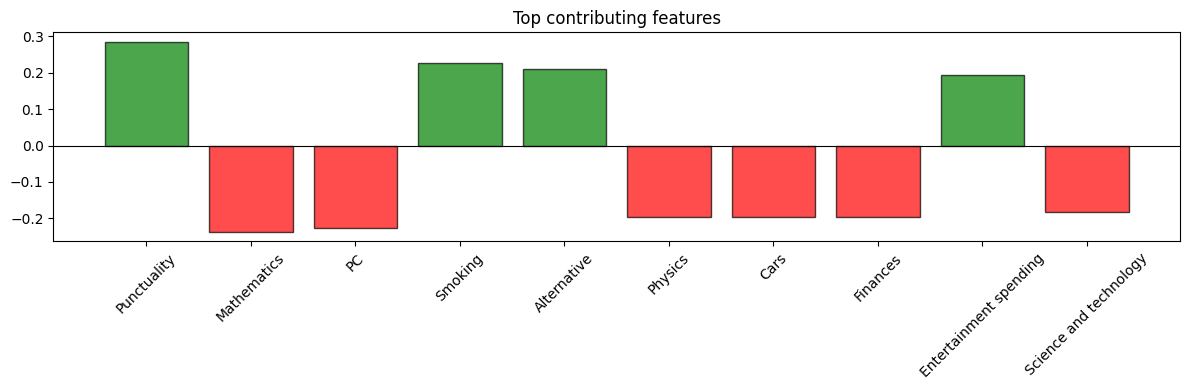

PC5
	🟢 Positive correlated features 🟢
Ageing                         +0.22
Spiders                        +0.22
Punk                           +0.21
Rats                           +0.20
Metal or Hardrock              +0.19
War                            +0.19
Snakes                         +0.19
Dangerous dogs                 +0.19
Changing the past              +0.18
Hypochondria                   +0.17


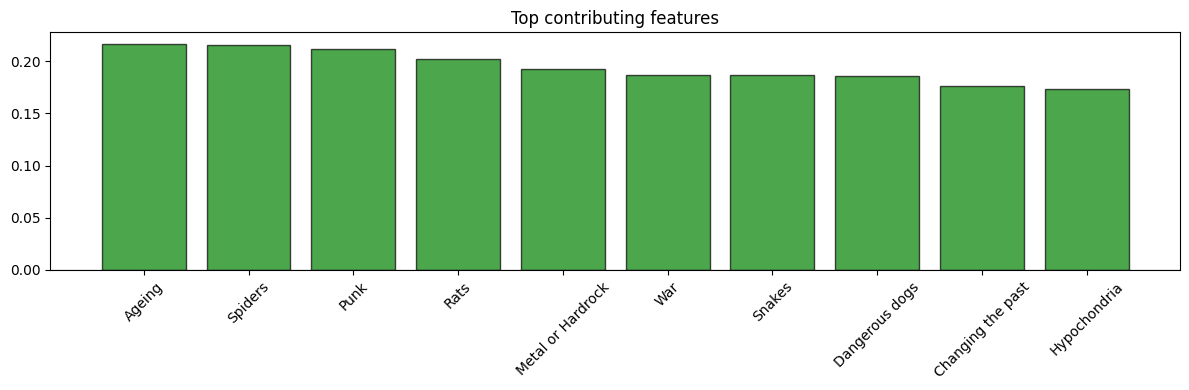

In [17]:
# Extract and loop the principal components
components = pca.components_
for i, pc in enumerate(components):
    print(f"PC{i+1}")
    single_pc_analysis(pc, responses_ft_pp.columns)

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

- PC1, **Anxious Urbanite**: The dominace of `'Shopping'`, `'Celebrities'`, and `'Romantic'` combined with high correlation with phobias (`'Spiders'`, `'Snakes'`, ...) suggests a personality that prefer a safe urban like, avoiding the wild/nature threats;
- PC2, **Cultural Intellectual**: Indicates a personality that is interested in culture (`'Opera'`, `'Jazz'`, ...) and learning hobbies (`'History'`, `'Documentaries'`, ...);
- PC3, **Extrovert**: Describes high-energy people, that loves socializing, care about appearance (`'Cars'`, `'Gadgets'`, ...), and follows trends (`'Rap/Hiphop'`);
- PC4, **Social Anti-Tech**: The negative correlation with `'Math'`, `'PC'`, `'Physics'` combined with the positive correlation with `'Smoking`' and '`Entertainment'` suggests someone who avoids *nerdy* solitary pursuits in favor of social ones;
- PC5, **Nostalgic Rebel**: The mix of `'Punk'`, `'Metal'`, `'War'`, and `'Changing the past'` (nostalgia, or regret) combined with `'Hypochondria'` classifies someone who perhaps is dissatisfied with their current situation.

#### Write the code for visualizing the score graph (with PC names on the axis):

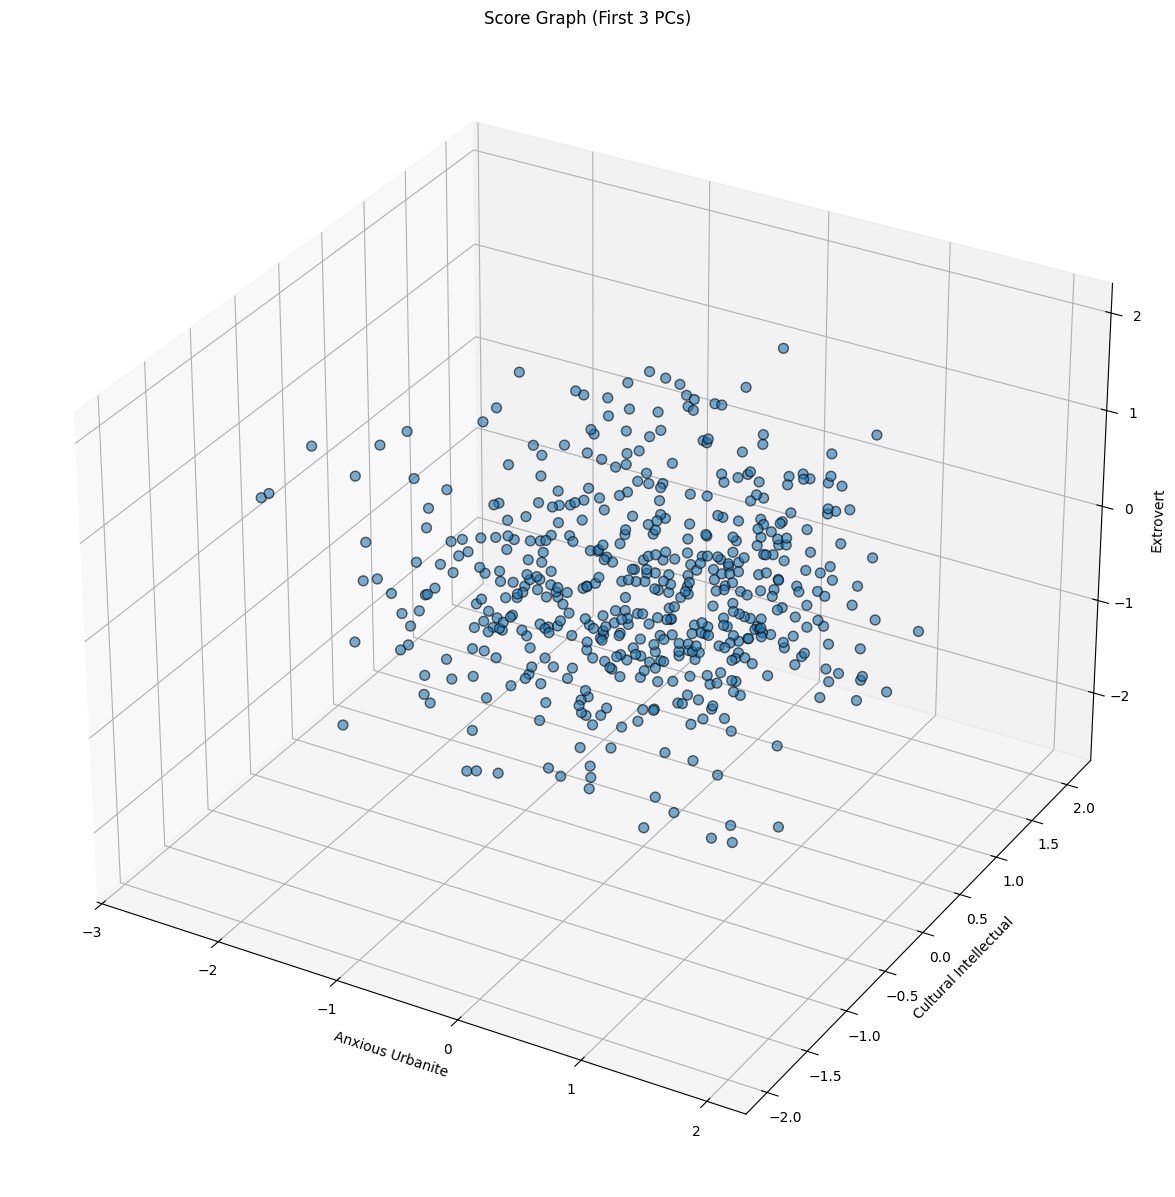

In [18]:
pc_names = ['Anxious Urbanite', 'Cultural Intellectual', 'Extrovert', 'Social Anti-Tech', 'Nostalgic Rebel']
# Store in dataframe with the custom names
responses_ft_pca = pd.DataFrame(
    responses_ft_pca_data, 
    columns=pc_names, 
    index=responses_ft_pp.index
)

# m >= 3 => 3D Plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

xs = responses_ft_pca['Anxious Urbanite']
ys = responses_ft_pca['Cultural Intellectual']
zs = responses_ft_pca['Extrovert']

ax.scatter(xs, ys, zs, alpha=0.6, s=50, edgecolors='black')

ax.set_xlabel(f'Anxious Urbanite')
ax.set_ylabel(f'Cultural Intellectual')
ax.set_zlabel(f'Extrovert')
ax.set_title('Score Graph (First 3 PCs)')
plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

Best k identified: 3 (Score: 0.1803)


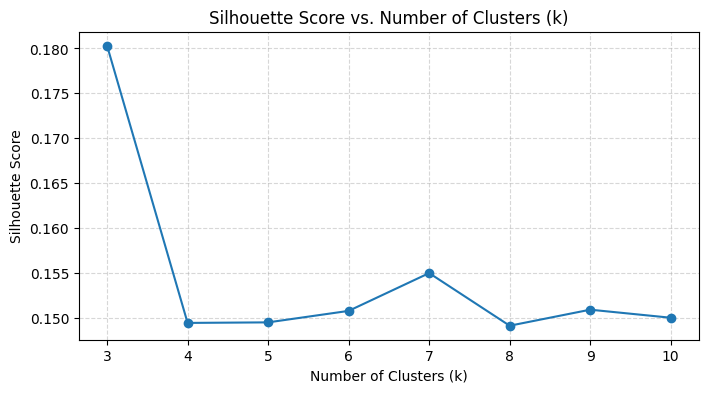

In [28]:
# Find Best k using Silhouette Score
def run_kmeans(range_k, random_state=random_seed):
    silhouette_scores = []
    best_k = range_k[0]
    best_score = -1

    for k in range_k:
        current_kmeans = KMeans(n_clusters=k, random_state=random_state)
        labels_temp = current_kmeans.fit_predict(responses_ft_pca)
        score = silhouette_score(responses_ft_pca, labels_temp)
        silhouette_scores.append(score)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    return best_k, best_score, silhouette_scores

# Run k-means
range_k = range(3, 11)
best_k, best_score, silhouette_scores = run_kmeans(range_k)
print(f"Best k identified: {best_k} (Score: {best_score:.4f})")

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range_k, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

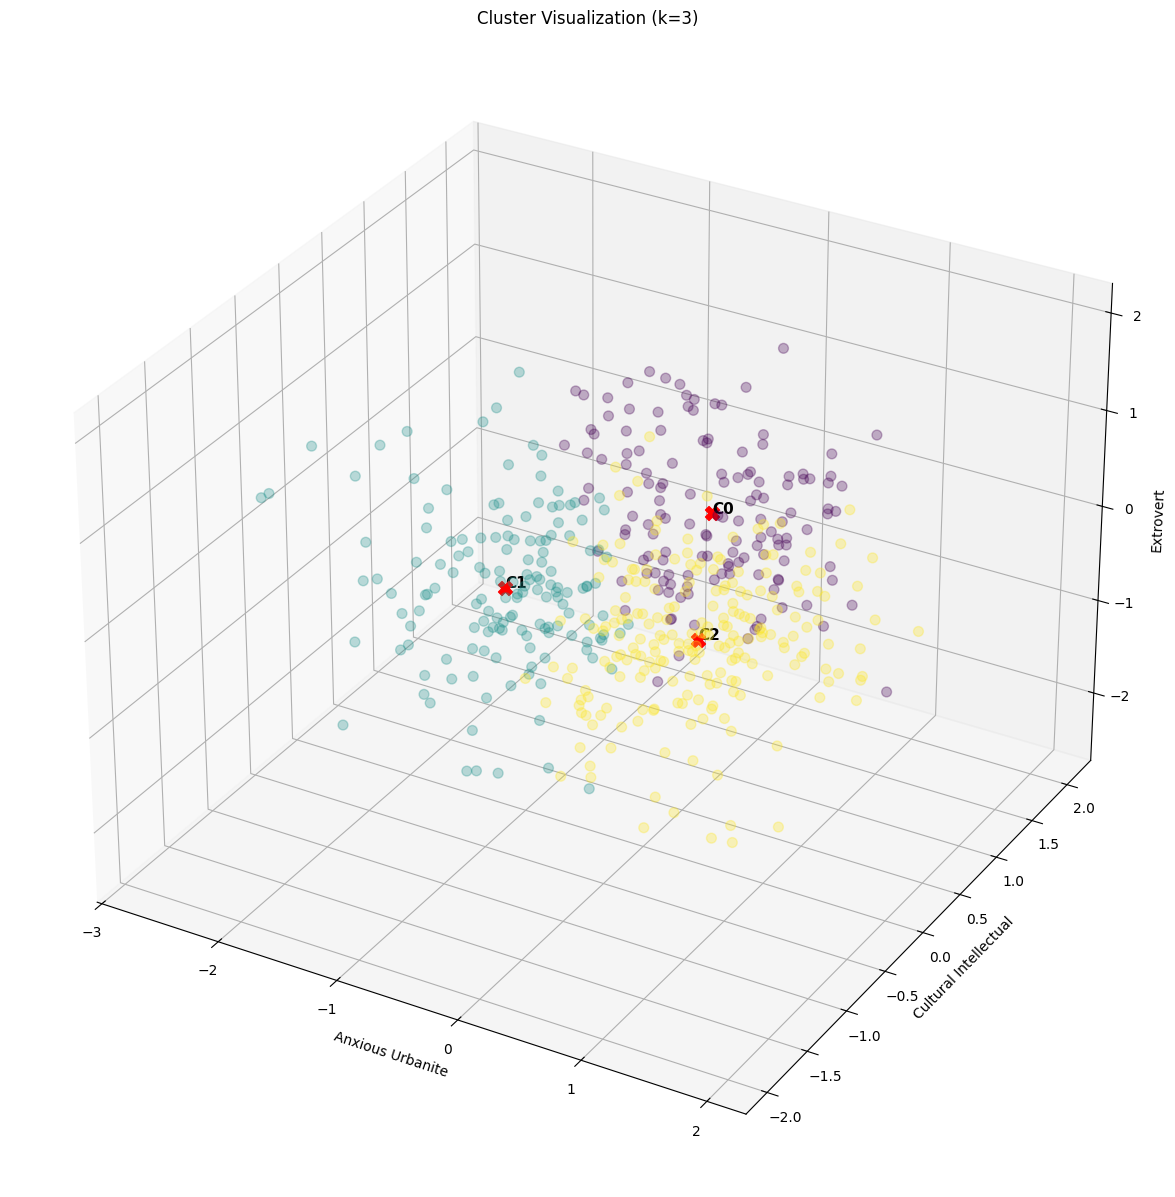

In [20]:
# Run k-Means with the Best k
kmeans = KMeans(n_clusters=best_k, random_state=random_seed)
cluster_labels = kmeans.fit_predict(responses_ft_pca)

# Visualize Cluster
# 3D Plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

xs = responses_ft_pca[pc_names[0]]
ys = responses_ft_pca[pc_names[1]]
zs = responses_ft_pca[pc_names[2]]

scatter = ax.scatter(xs, ys, zs, c=cluster_labels, alpha=0.3, s=50)

# Plot Centroids
# Map cluster lables
cluster_names = {
    0: "C0", 
    1: "C1", 
    2: "C2"
}

centroids = kmeans.cluster_centers_
for i in range(best_k):
    ax.text(
        centroids[i, 0],  # x-coordinate
        centroids[i, 1],  # y-coordinate
        centroids[i, 2],  # z-coordinate
        cluster_names[i],
        fontsize=11, 
        color='black', 
        weight='bold'
    )
    ax.scatter(
        centroids[i, 0],  # x-coordinate
        centroids[i, 1],  # y-coordinate
        centroids[i, 2],  # z-coordinate
        s=100, color='red', marker='X', label=f'Centroid {i+1}'
    )
    
ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2])
ax.set_title(f'Cluster Visualization (k={best_k})')
plt.show()

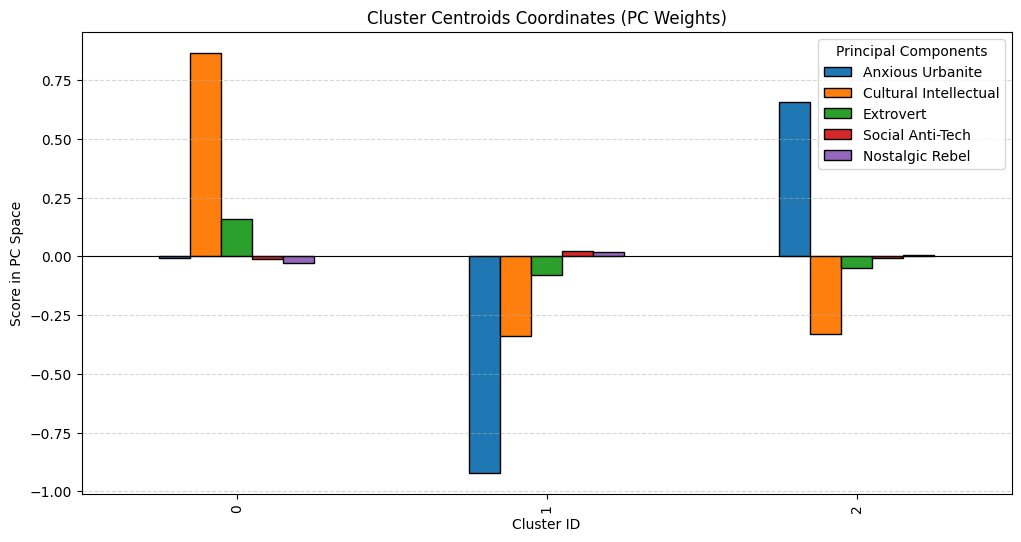

In [27]:
# Visualize Centroids as Barplots (Interpretation)
centroid_df = pd.DataFrame(centroids, columns=responses_ft_pca.columns)

centroid_df.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Cluster Centroids Coordinates (PC Weights)')
plt.xlabel('Cluster ID')
plt.ylabel('Score in PC Space')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='Principal Components')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

- Centroid 0, **Extrovert Intellectuals**: This cluster combines people from PC2 (Cultural Intellectual) and from PC3 (Extroverts). Indicates profiles that are highly engaged with "high culture" hobbies, but with a strong social and active life;
- Centroid 1, **Fearless Tech**: Combines people that have a calm attitude (negative correlation with PC1, Anxious Urbanite) and are more tech-oriented (negative correlation with PC2, Cultural Intellectual). This reflects gamers or simply tech enthusiasts who prefer model entertainments, without having strong fears towards nature. The slight touch of negative correlation with Extrovert (so introvert people), also reflect the classic stereotype of gamers;
- Centroid 2, **Average Consumer**: This cluster combines people from PC1 (Anxious Urbanite) with profiles that lacks cultural interest (negative correlation with PC2). They represents the average consumer: enjoy shopping, follow mainstream trends, without specific interests in arts or heavy intellectual topics.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

- **Gender**: Check if *Average Consumer* (C2) or *Fearless Tech* (C1) have a gender imbalance (fears and shopping traits are often sterotypically skewed in surveys);
- **Education**: Check if *Extrovert Intellectuals* (C0) corresponds to higher education level;

#### Write the code for the visualizations cited in item 2 above:

In [22]:
# Adding the Cluster names in the dataframe
cluster_names = {
    0: "Extrovert Intellectuals", 
    1: "Fearless Tech", 
    2: "Average Consumer"
}
cluster_df = responses_ft_pca.copy()
cluster_df['Cluster'] = cluster_labels
cluster_df['Cluster names'] = cluster_df['Cluster'].map(cluster_names)

In [23]:
def get_distinct_color_per_label(label):
    unique_values = responses_lb[label].unique()
    # Map each unique value to a different color
    colors = cm.jet(np.linspace(0, 1, len(unique_values)))
    return unique_values, colors

def analyze_label(reference_df, label_to_analyze):
    print(f"Analyzing Label: {label_to_analyze}")
    
    # Extract unique values and assign a color for each value
    unique_values, color_per_value = get_distinct_color_per_label(label_to_analyze)
    
    # Compute global distribution
    global_counts = reference_df[label_to_analyze].value_counts(normalize=True).sort_index().to_frame().T
    global_counts.index = ['Global']

    # Per cluster distribution
    cluster_counts = pd.crosstab(reference_df['Cluster names'], reference_df[label_to_analyze], normalize='index')
    combined_counts = pd.concat([global_counts, cluster_counts]) * 100

    # Bar plot for label distribution, comparing global and per-cluster
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a color map for the bar plot
    color_mapping = dict(zip(unique_values, color_per_value))
    bar_colors = [color_mapping[col] for col in combined_counts.columns]
    
    combined_counts.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', color=bar_colors)

    ax.set_title(f"Distribution of '{label_to_analyze}': Global vs Per-Cluster")
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Group')
    ax.legend(title=label_to_analyze, bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1) # dashed line to visually separate Global from Clusters

    plt.tight_layout()
    plt.show()
    
    # Score graph. 2D (PC1-PC2 as axis)
    x_axis, y_axis = pc_names[0], pc_names[1]
    
    plt.figure(figsize=(8, 6))
    
    for value, color in zip(unique_values, color_per_value):
        # Select current value
        mask = reference_df[label_to_analyze] == value
        
        # Scatter plot for the current value with its color
        plt.scatter(
            reference_df.loc[mask, x_axis], # x_axis PC1 -> Anxious Urbanite
            reference_df.loc[mask, y_axis], # y_axis PC2 -> Cultural Intellectual
            label=value,
            color=color,
            alpha=0.7,
            edgecolor='black',
            s=60
        )
    plt.legend(title=label_to_analyze, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(f"Score Graph colored by '{label_to_analyze}' (Whole Dataset)")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # Per-Cluster Score graph. 2D (PC1-PC2 as axis)
    # sharex and sharey set to True => plots will have the same scale
    fig, axes = plt.subplots(1, best_k, figsize=(5 * best_k, 5)) #, sharex=True, sharey=True
    
    # Global limits to keep scales consistent across subplots
    x_lims = (reference_df[x_axis].min() - 0.5, reference_df[x_axis].max() + 0.5)
    y_lims = (reference_df[y_axis].min() - 0.5, reference_df[y_axis].max() + 0.5)
    
    for k in range(best_k):
        ax = axes[k]
        cluster_mask = reference_df['Cluster'] == k
        subset = reference_df[cluster_mask]
        
        for value, color in zip(unique_values, color_per_value):
            mask_val = subset[label_to_analyze] == value
            ax.scatter(
                subset.loc[mask_val, x_axis],
                subset.loc[mask_val, y_axis],
                label=value,
                color=color,
                edgecolor='black',
                alpha=0.7
            )
        # Legend on the last plot only to avoid clutter
        if k == best_k - 1: ax.legend(title=label_to_analyze) #, loc='best', fontsize='small'

        ax.set_title(f'Cluster {cluster_names[k]}')
        ax.set_xlabel(x_axis)
        if k == 0: ax.set_ylabel(y_axis) # Add ylabel only on the rigth
        ax.set_xlim(x_lims)
        ax.set_ylim(y_lims)
        ax.grid(True)
    
    plt.suptitle(f"Separated Clusters colored by '{label_to_analyze}'")
    plt.tight_layout()
    plt.show()

Analyzing Label: Gender


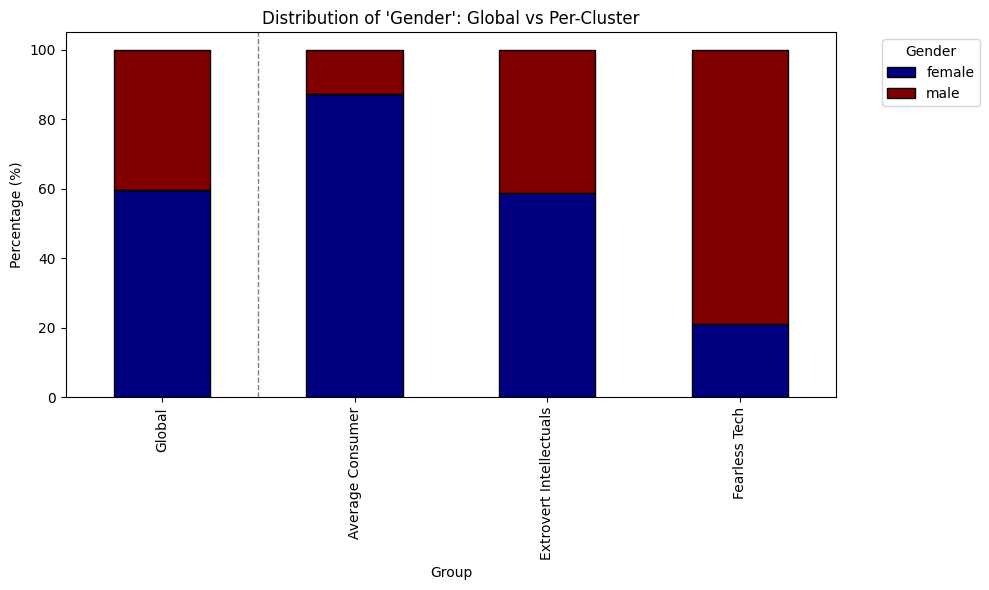

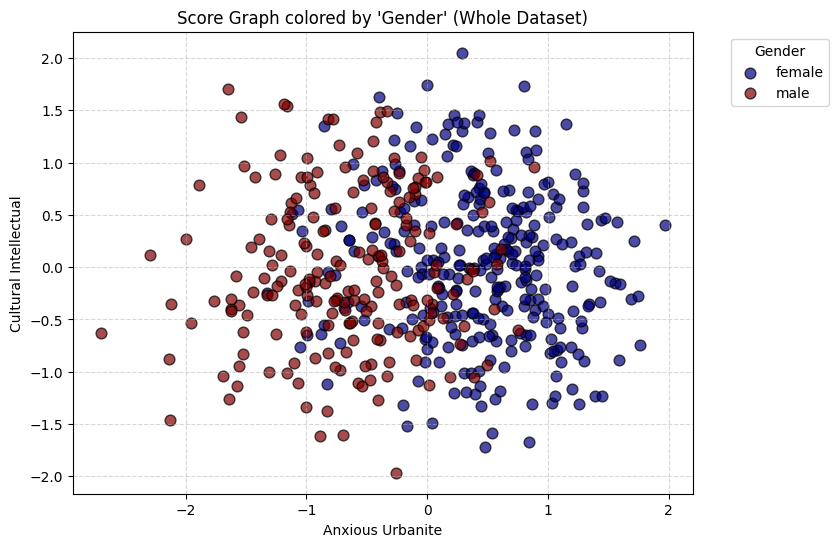

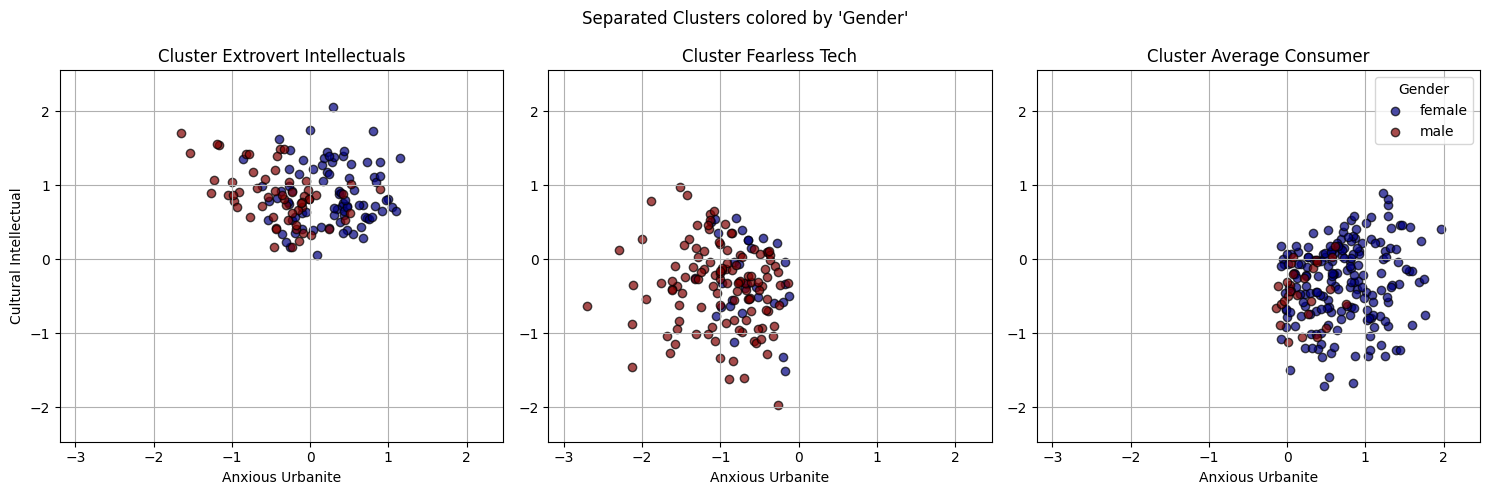

Analyzing Label: Education


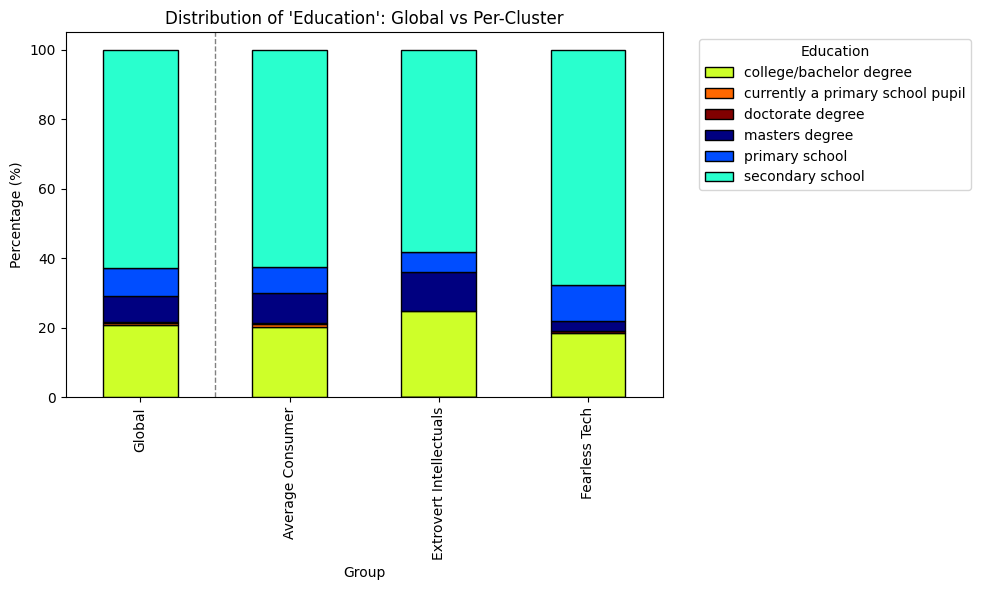

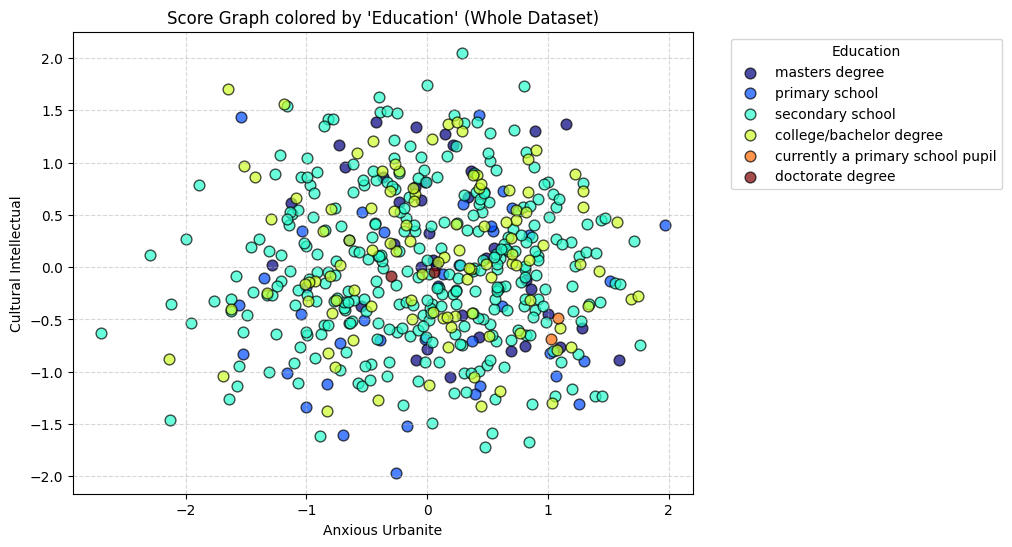

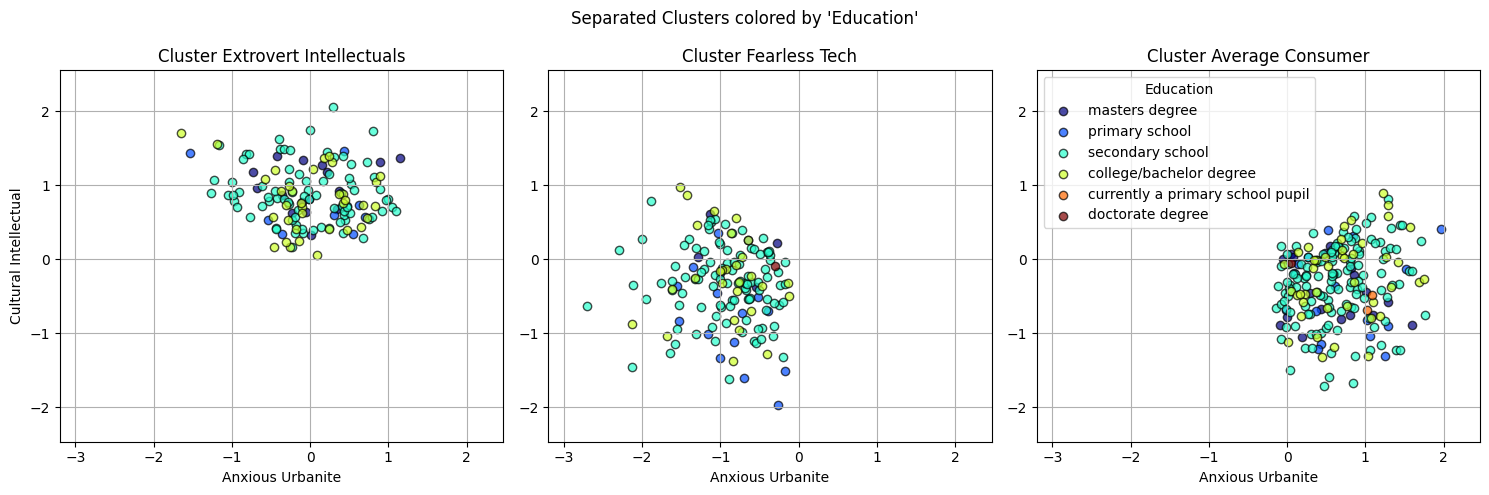

In [24]:
# Define the labels to analyze
selected_labels = ['Gender', 'Education']

# Copy the dataframe, and join with the label dataset
reference_df = cluster_df.copy()
reference_df = reference_df.join(responses_lb[selected_labels])

for label in selected_labels: analyze_label(reference_df, label)

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

- **Gender**: _Cluster 1_ (Fearless Tech) is predominantly male ($\approx$ 80%), aligning with the stereotypical "gaming/tech" interests found in that profile. Conversely, _Cluster 2_ (Average Consumer) is over 80% female, which explains the strong positive correlation with PC1 (Anxious Urbanite), as traits like `'Shopping'` and specific phobias often show gendered trends in this dataset. _Cluster 0_ (Extrovert Intellectuals) appears gender-neutral in terms of distinct counts ($\approx$ 50/50). However, the scatter plot reveals a clear internal split: males are positioned on the left (closer to the male-dominated Fearless Tech), while females are on the right (closer to the female-dominated Average Consumer). This suggests that while they share the "Intellectual" trait (high PC2), they remain differentiated by the "Anxious/Shopping" traits (PC1) typical of their gender-dominant neighbors.
- **Education**: Unlike gender, Education levels are remarkably uniform across all clusters, almost mirroring the global distribution. It is worth mention that the initial hypotesis ("Check if *Extrovert Intellectuals* (C0) corresponds to higher education level") can be consider somewhat satified, since the distribution plot shows a slight increase of `'college/bachelor degree'` and `'master degree'` with respect to the global distribution.

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

	Global Average Silhouette Score: 0.1803

	Average silhouette score per cluster:
Cluster 0 Extrovert Intellectuals  : 0.1515
Cluster 1 Fearless Tech            : 0.1902
Cluster 2 Average Consumer         : 0.1923


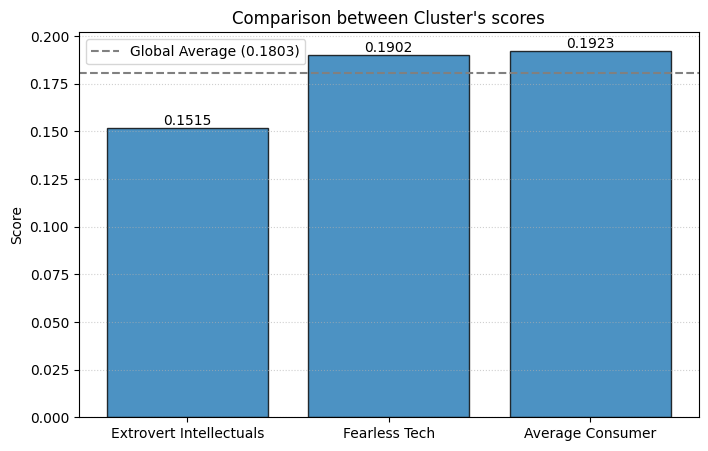

In [25]:
cluster_df_data = cluster_df.copy()
cluster_df_data.drop(labels=['Cluster', 'Cluster names'], axis=1, inplace=True)

# Average global score
global_average_score = silhouette_score(cluster_df_data, cluster_labels)
print(f"\tGlobal Average Silhouette Score: {global_average_score:.4f}")

# Silhouette score per cluster
sample_silhouette_values = silhouette_samples(cluster_df_data, cluster_labels)
cluster_avg_scores = []

# Print and save per-cluster score
print("\n\tAverage silhouette score per cluster:")
for i in range(best_k):
    cluster_mask = cluster_labels == i    
    avg_score = sample_silhouette_values[cluster_mask].mean()
    
    print(f"Cluster {i} {cluster_names[i]:<25}: {avg_score:.4f}")
    cluster_avg_scores.append(avg_score)

# Create the comparison plot
plt.figure(figsize=(8, 5))

# Bar plot, with label
bars = plt.bar(cluster_names.values(), cluster_avg_scores, edgecolor='black', alpha=0.8)
for b in bars:
    yval = b.get_height()
    plt.text(
        b.get_x() + b.get_width()/2, # Center
        yval,
        f'{yval:.4f}',
        ha='center',
        va='bottom'
    )

# Add the global average as a dotted line
plt.axhline(y=global_average_score, color='grey', linestyle='--', label=f'Global Average ({global_average_score:.4f})')

plt.title("Comparison between Cluster's scores")
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.show()

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):
The global silhouette score (0.1803) is positive but low, indicating that the clusters are not distinct islands but rather regions within a continuous density.

Comparing clusters, _Average Consumer_ (0.1923) and _Fearless Tech_ (0.1902) are the most defined. This aligns with Exercise 5, where these groups strongly split by Gender, creating clearer boundaries.

_Extrovert Intellectuals_ (0.1515) has the lowest score. This is explained by the internal polarization observed in Exercise 5: males and females within this cluster do not mix but are pulled toward opposite sides (left and right, respectively). This division is likely the cause of the reduced cluster's score.